In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
# import testing_2 as tst

## Importo Ti de las ZT base y con imputaciones (base y ann)

In [190]:
# pbscom
# n2str
# n1au404
sim_base=pd.read_csv('simulation_data/base_EPW_2.csv',index_col=0,parse_dates=True)#'simulation_data/base_EPW.csv'
sim_ann_imp=pd.read_csv('simulation_data/cnn_mae_adiabatic.csv',index_col=0,parse_dates=True)
# 'simulation_data/cnn_mae.csv'
sim_base

,N1AU401,N1AU402,N1AU403,N1AU404,N2AU101,N2AU102,N2AU103,N2AU201,N2AU202,N2AU203,...,PBCOORDINACION,PBDUCTOCOFI,PBDUCTOSALAS,PBDUCTOSCOM,PBIMP,PBSCOM,PBSJUNTAS,PBSMAESTROS,PBSTR,PBVESTIBULO
tiempo,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:10:00,23.738173,23.949839,23.775587,25.324705,24.207311,24.214150,24.241284,22.820581,23.279413,23.267277,...,22.830313,26.684009,26.645582,24.968785,26.130139,24.418206,23.118030,24.448884,23.752773,24.903100
2018-01-01 00:20:00,23.733359,23.943982,23.768662,25.304062,24.202969,24.210115,24.237038,22.822253,23.281009,23.268844,...,22.831416,26.649801,26.610566,24.961128,26.110984,24.399791,23.119959,24.441968,23.749190,24.891442
2018-01-01 00:30:00,23.728219,23.937983,23.761512,25.282995,24.198409,24.205839,24.232562,22.823778,23.282577,23.270383,...,22.831907,26.612173,26.571688,24.952992,26.090952,24.380650,23.121638,24.434812,23.745257,24.879780
2018-01-01 00:40:00,23.722750,23.931848,23.754148,25.261478,24.193592,24.201281,24.227814,22.825176,23.284109,23.271886,...,22.831731,26.577267,26.536270,24.944329,26.069939,24.360792,23.123038,24.427369,23.740960,24.868044
2018-01-01 00:50:00,23.717036,23.925661,23.746647,25.239513,24.188467,24.196392,24.222743,22.826533,23.285602,23.273351,...,22.830867,26.550395,26.510628,24.935063,26.047972,24.340085,23.124156,24.419478,23.736289,24.855802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:20:00,23.427020,23.790014,23.596194,25.467271,24.051160,24.112344,24.139444,22.337408,23.039462,23.014559,...,22.352232,26.711206,26.740643,25.015099,26.197440,24.296417,22.781878,24.274115,23.476255,24.791669
2018-12-31 23:30:00,23.420371,23.783357,23.588232,25.440347,24.044247,24.105657,24.132577,22.338010,23.041442,23.016552,...,22.348441,26.669658,26.697680,25.004137,26.174953,24.268962,22.782176,24.262823,23.469984,24.774728
2018-12-31 23:40:00,23.413262,23.776466,23.579982,25.413005,24.037031,24.098720,24.125504,22.338252,23.043383,23.018507,...,22.343916,26.630228,26.657471,24.992696,26.150920,24.240755,22.782060,24.251041,23.463148,24.757381


In [191]:
dias=['2018-01-30 07:20:00',
      '2018-01-12 07:20:00',
      '2018-06-15 06:10:00',
      '2018-04-17 06:30:00',
      '2018-08-12 06:30:00',
      '2018-07-19 06:20:00',
      '2018-11-14 06:50:00',
      '2018-12-21 07:10:00']

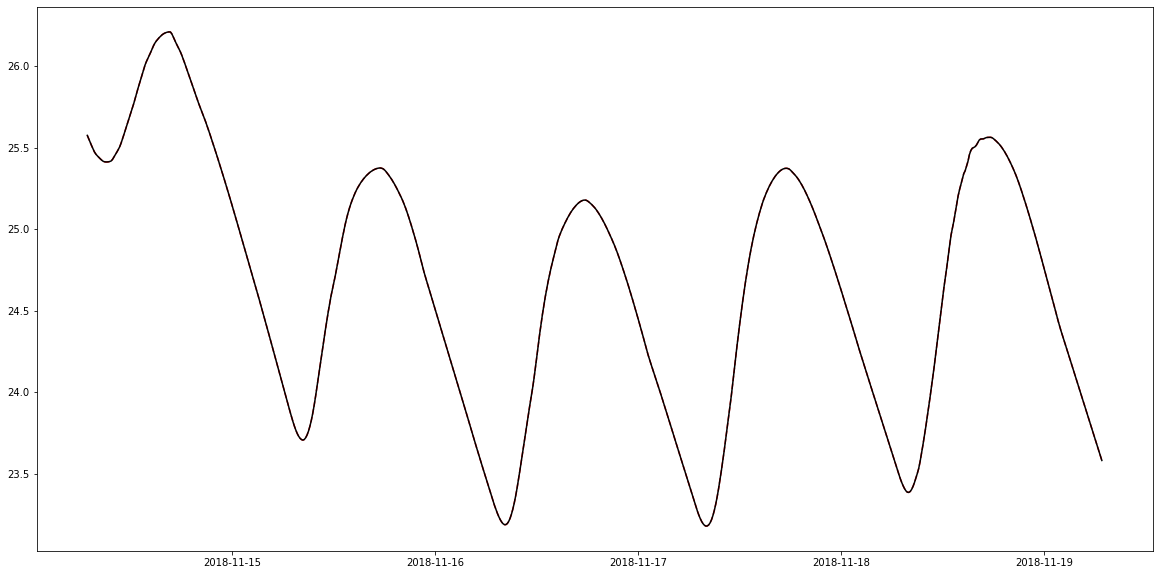

In [192]:
dia=6
fig, ax=plt.subplots(figsize=(20,10))
ax.plot(sim_ann_imp.loc[dias[dia]:parse(dias[dia])+pd.Timedelta('5D')].N1AU404,'r--')
ax.plot(sim_base.loc[dias[dia]:parse(dias[dia])+pd.Timedelta('5D')].N1AU404,'k-')

In [163]:
def actualizar_bitacora(infodf,cols_gen,path,nombre_archivo): #adds a new row on a predetermined dataframe 
    df=pd.read_csv(path+nombre_archivo)
    infodf=pd.DataFrame(data=infodf,columns=cols_gen)
    newdf=pd.concat([df,infodf])
    newdf=newdf.set_index('Maximum_error')
    newdf.to_csv(path+nombre_archivo)
    return(pd.read_csv((path+nombre_archivo)))


In [164]:
def simulation_metrics(df_base,df2,dias,dia,tolerance,zt):
        df_inic=pd.DataFrame(np.abs(df_base[zt]-df2[zt]))
        df_rolled=df_inic.loc[parse(dias[dia])+pd.Timedelta('10H'):parse(dias[dia])+pd.Timedelta('100D')]
        df_rolled=df_inic.loc[parse(dias[dia])+pd.Timedelta('10H'):parse(dias[dia])+pd.Timedelta('100D')].rolling(6*4,center=True).mean()
        df_rolled.loc[df_rolled[zt]<tolerance,'vanish_day']=True #Gets the time in which the mean difference of the hour is less than the tolerance
        df_end=df_rolled[df_rolled.vanish_day.isnull()==False] #Obtains the first time the conditional from above is true
        df_diff=df_inic.loc[parse(dias[dia])+pd.Timedelta('50Min'):parse(dias[dia])+pd.Timedelta('100D')].rolling(6*4,center=True).mean().diff()
        i=0
        while(True):
            i=i+1
            df_end_index=str(df_end.index[i])
            if df_diff[zt].loc[df_end_index]<0:
                break
        vanish_time=pd.Timedelta(df_end.index[i]-parse(dias[dia]))
        print('vanish_time:',vanish_time)
        max_index_error=parse(str(df_inic[zt].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)].idxmax()))
        max_error=df_inic[zt].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)].max()
        max_time=pd.Timedelta(max_index_error-parse(dias[dia]))
        down_time=df_end.index[i]-max_index_error
    #     print('tiempo de maximo error:',max_index_error)
    #     print('tiempo para maximo error:',max_time)
    #     print('tiempo de bajada:',down_time)
    #     print('valor maximo de error:',max_error)

        return(vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff)

In [167]:
tolerance=.1
thermal_zone='N2STR'
plus='adiabatic'
# 'N1AU404'
# 'PBSCOM'
path_metrics='02_simulation_metrics/'
file_metrics='ann_imputation_metrics'+thermal_zone+plus+'.csv'
tz=thermal_zone
sim_imputed=sim_ann_imp
save=True
for dia in range(len(dias)):
    vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
    sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(sim_base[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'k-',label='simulacion base')
    ax2=ax.twinx()
    ax.plot(sim_imputed[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='imputed values')
    ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
    ax.legend()
    #ax2.legend()
    ax2.set_ylim(0,1.4)
#     ax.set_ylim(20,27)
    ax2.grid()
    plt.show()
    if save==True:
        if dia==0:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
            cols=['Date_imputed','vanishing_time','Maximum_error','Time of maximum error','Time_for_maximum_error','Time from maximum to tolerated error']
            simulation_met=pd.DataFrame(first,columns=cols)
            simulation_met=simulation_met.set_index('Maximum_error')
            simulation_met.to_csv(path_metrics+file_metrics)
        else:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
            actualizar_bitacora(first,cols,path_metrics,file_metrics)

IndexError: index 14318 is out of bounds for axis 0 with size 14318

In [168]:
tolerance=.1
thermal_zone='N1AU404'
# 'PBSCOM'
path_metrics='02_simulation_metrics/'
file_metrics='ann_imputation_metrics'+thermal_zone+plus+'.csv'
tz=thermal_zone
sim_imputed=sim_ann_imp
# save=False
for dia in range(len(dias)):
    vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
    sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(sim_base[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'k-',label='simulacion base')
    ax2=ax.twinx()
    ax.plot(sim_imputed[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='imputed values')
    ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
    ax.legend()
    #ax2.legend()
    ax2.set_ylim(0,1.4)
#     ax.set_ylim(20,27)
    ax2.grid()
    plt.show()
    if save==True:
        if dia==0:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
#             cols=['Date_imputed','vanishing_time','Maximum error','Time of maximum error','Time for maximum error','Time from maximum to tolerated error']
            simulation_met=pd.DataFrame(first,columns=cols)
            simulation_met=simulation_met.set_index('Maximum_error')
            simulation_met.to_csv(path_metrics+file_metrics)
        else:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
            actualizar_bitacora(first,cols,path_metrics,file_metrics)

IndexError: index 14318 is out of bounds for axis 0 with size 14318

In [169]:
tolerance=.1
thermal_zone='PBSCOM'#'PBSCOM'#'N2STR'
# 'N1AU404'
# 'PBSCOM'
path_metrics='02_simulation_metrics/'
file_metrics='ann_imputation_metrics'+thermal_zone+plus+'.csv'
tz=thermal_zone
sim_imputed=sim_ann_imp
# save=False
for dia in range(len(dias)):
    vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
    sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(sim_base[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'k-',label='simulacion base')
    ax2=ax.twinx()
    ax.plot(sim_imputed[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='imputed values')
    ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
    ax.legend()
    #ax2.legend()
    ax2.set_ylim(0,1.4)
#     ax.set_ylim(20,27)
    ax2.grid()
    plt.show()
    if save==True:
        if dia==0:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
            simulation_met=pd.DataFrame(first,columns=cols)
            simulation_met=simulation_met.set_index('Maximum_error')
            simulation_met.to_csv(path_metrics+file_metrics)
        else:
            first=np.array([dias[dia],vanish_time,max_error,max_index_error,max_time,down_time]).reshape(1,6)
            actualizar_bitacora(first,cols,path_metrics,file_metrics)


IndexError: index 14318 is out of bounds for axis 0 with size 14318

In [151]:
ann_metrics_pb=pd.read_csv(path_metrics+'ann_imputation_metricsPBSCOM.csv')

ann_metrics_pb[['Date_imputed','vanishing_time',
            'Maximum_error','Time_for_maximum_error']]



,Date_imputed,vanishing_time,Maximum_error,Time_for_maximum_error
0,2018-01-30 07:20:00,2 days 07:20:00,0.458876,0 days 12:50:00
1,2018-01-12 07:20:00,0 days 12:10:00,0.009507,0 days 04:50:00
2,2018-06-15 06:10:00,5 days 03:50:00,1.523678,0 days 13:20:00
3,2018-04-17 06:30:00,0 days 16:10:00,0.045908,0 days 15:20:00
4,2018-08-12 06:30:00,5 days 02:10:00,1.566099,0 days 12:30:00
5,2018-07-19 06:20:00,0 days 22:50:00,0.192730,0 days 10:30:00
6,2018-11-14 06:50:00,5 days 06:40:00,1.662901,0 days 11:40:00
7,2018-12-21 07:10:00,0 days 12:10:00,0.041641,0 days 08:20:00


In [152]:
ann_metrics_n1=pd.read_csv(path_metrics+'ANN_imputation_metricsN1AU404.csv')
ann_metrics_n1[['Date_imputed','vanishing_time',
            'Maximum_error','Time_for_maximum_error']]




,Date_imputed,vanishing_time,Maximum_error,Time_for_maximum_error
0,2018-01-30 07:20:00,4 days 11:10:00,0.439586,0 days 14:00:00
1,2018-01-12 07:20:00,0 days 12:10:00,0.010131,0 days 01:00:00
2,2018-06-15 06:10:00,8 days 12:50:00,1.344752,0 days 13:40:00
3,2018-04-17 06:30:00,0 days 16:20:00,0.037340,0 days 15:30:00
4,2018-08-12 06:30:00,8 days 09:50:00,1.364670,0 days 13:00:00
5,2018-07-19 06:20:00,0 days 22:20:00,0.158764,0 days 10:30:00
6,2018-11-14 06:50:00,8 days 20:40:00,1.563570,0 days 10:00:00
7,2018-12-21 07:10:00,0 days 12:10:00,0.035402,0 days 08:20:00


In [153]:
ann_metrics_n2=pd.read_csv(path_metrics+'ANN_imputation_metricsN2STR.csv')
ann_metrics_n2[['Date_imputed','vanishing_time',
            'Maximum_error','Time_for_maximum_error']]


,Date_imputed,vanishing_time,Maximum_error,Time_for_maximum_error
0,2018-01-30 07:20:00,4 days 08:50:00,0.369614,0 days 12:40:00
1,2018-01-12 07:20:00,0 days 12:10:00,0.009586,0 days 06:50:00
2,2018-06-15 06:10:00,8 days 11:50:00,1.134428,0 days 13:50:00
3,2018-04-17 06:30:00,0 days 16:40:00,0.033135,0 days 16:00:00
4,2018-08-12 06:30:00,8 days 06:20:00,1.173308,0 days 13:10:00
5,2018-07-19 06:20:00,0 days 18:10:00,0.136017,0 days 10:30:00
6,2018-11-14 06:50:00,8 days 22:10:00,1.353847,0 days 09:50:00
7,2018-12-21 07:10:00,0 days 12:10:00,0.031030,0 days 08:20:00


In [154]:
str(ann_metrics_n1[['Date_imputed','vanishing_time','Maximum_error','Time_for_maximum_error']]).replace('  ','&').replace('\n','\\ \hline')
# (ann_metrics[['Date_imputed','vanishing_time',
#             'Maximum_error','Time_for_maximum_error']]
# )

'&&&&&Date_imputed& vanishing_time&Maximum_error Time_for_maximum_error\\ \\hline0&2018-01-30 07:20:00&4 days 11:10:00&&& 0.439586&&&&0 days 14:00:00\\ \\hline1&2018-01-12 07:20:00&0 days 12:10:00&&& 0.010131&&&&0 days 01:00:00\\ \\hline2&2018-06-15 06:10:00&8 days 12:50:00&&& 1.344752&&&&0 days 13:40:00\\ \\hline3&2018-04-17 06:30:00&0 days 16:20:00&&& 0.037340&&&&0 days 15:30:00\\ \\hline4&2018-08-12 06:30:00&8 days 09:50:00&&& 1.364670&&&&0 days 13:00:00\\ \\hline5&2018-07-19 06:20:00&0 days 22:20:00&&& 0.158764&&&&0 days 10:30:00\\ \\hline6&2018-11-14 06:50:00&8 days 20:40:00&&& 1.563570&&&&0 days 10:00:00\\ \\hline7&2018-12-21 07:10:00&0 days 12:10:00&&& 0.035402&&&&0 days 08:20:00'

In [155]:
ann_metrics_pb[['Date_imputed','vanishing_time','Maximum_error','Time_for_maximum_error']].to_latex()

'\\begin{tabular}{lllrl}\n\\toprule\n{} &         Date\\_imputed &   vanishing\\_time &  Maximum\\_error & Time\\_for\\_maximum\\_error \\\\\n\\midrule\n0 &  2018-01-30 07:20:00 &  2 days 07:20:00 &       0.458876 &        0 days 12:50:00 \\\\\n1 &  2018-01-12 07:20:00 &  0 days 12:10:00 &       0.009507 &        0 days 04:50:00 \\\\\n2 &  2018-06-15 06:10:00 &  5 days 03:50:00 &       1.523678 &        0 days 13:20:00 \\\\\n3 &  2018-04-17 06:30:00 &  0 days 16:10:00 &       0.045908 &        0 days 15:20:00 \\\\\n4 &  2018-08-12 06:30:00 &  5 days 02:10:00 &       1.566099 &        0 days 12:30:00 \\\\\n5 &  2018-07-19 06:20:00 &  0 days 22:50:00 &       0.192730 &        0 days 10:30:00 \\\\\n6 &  2018-11-14 06:50:00 &  5 days 06:40:00 &       1.662901 &        0 days 11:40:00 \\\\\n7 &  2018-12-21 07:10:00 &  0 days 12:10:00 &       0.041641 &        0 days 08:20:00 \\\\\n\\bottomrule\n\\end{tabular}\n'

vanish_time: 8 days 22:10:00
vanish_time: 8 days 20:40:00
vanish_time: 5 days 06:40:00


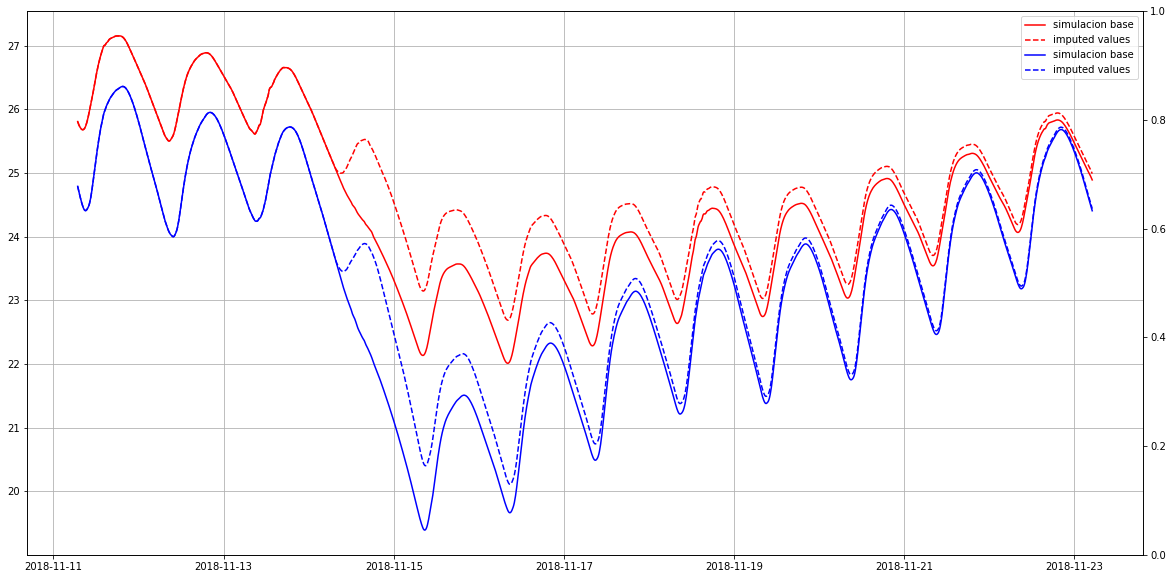

In [156]:
dia=6
thermal_zone='N2STR'
vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
fig, ax=plt.subplots(figsize=(20,10))
ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='simulacion base')

ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r--',label='imputed values')
ax2=ax.twinx()
# ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error_n2')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
thermal_zone='N1AU404'
vanish_time_n1,max_index_error_n1,max_time_n1,down_time_n1,max_error_n1,df_rolled_n1,df_inic_n1,df_diff_n1=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
# ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-',label='simulacion base')

# ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g--',label='imputed values')
# ax2.plot(df_inic_n1[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_n1)],'g-',label='error_n1')
#  
thermal_zone='PBSCOM'
vanish_time_pb,max_index_error_pb,max_time_pb,down_time_pb,max_error_pb,df_rolled_pb,df_inic_pb,df_diff_pb=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b-',label='simulacion base')

ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b--',label='imputed values')
# ax2.plot(df_inic_pb[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_pb)],'b-',label='error_pb')
#  
# ax2.plot(sim_base['N1AU404'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)]-sim_base['PBSCOM'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-')

ax.legend()
    #ax2.legend()
# ax2.set_ylim(0,1.7)
#     ax.set_ylim(20,27)
ax.grid()
plt.show()

No handles with labels found to put in legend.


vanish_time: 8 days 22:10:00
vanish_time: 8 days 20:40:00
vanish_time: 5 days 06:40:00


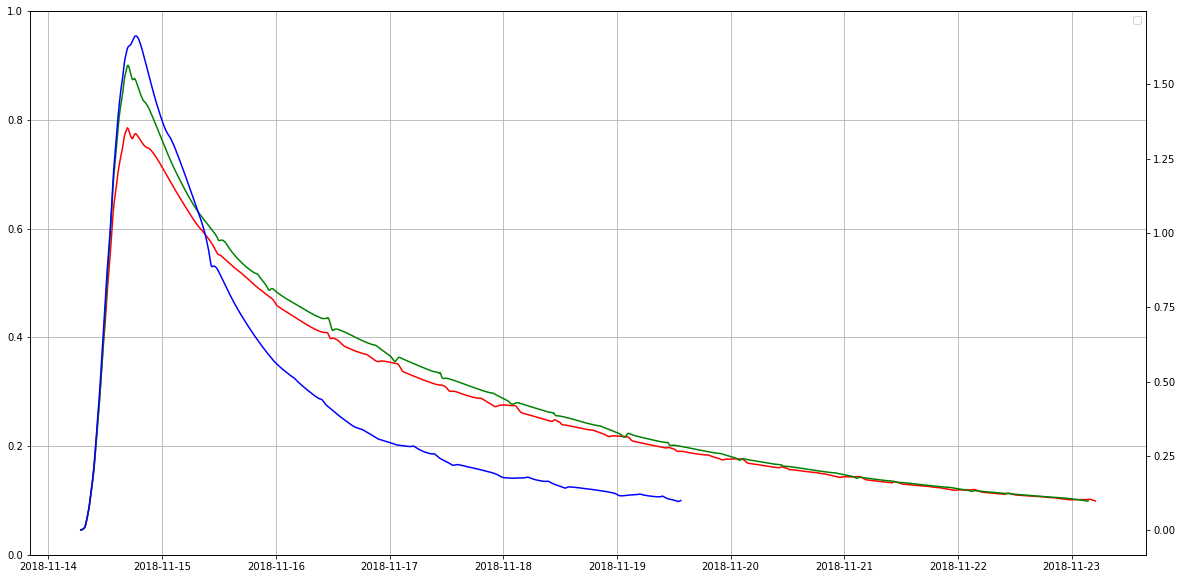

In [157]:
dia=6
thermal_zone='N2STR'
vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
fig, ax=plt.subplots(figsize=(20,10))
# ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='simulacion base')

# ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r--',label='imputed values')
ax2=ax.twinx()
ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error_n2')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
thermal_zone='N1AU404'
vanish_time_n1,max_index_error_n1,max_time_n1,down_time_n1,max_error_n1,df_rolled_n1,df_inic_n1,df_diff_n1=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
# ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-',label='simulacion base')

# ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g--',label='imputed values')
ax2.plot(df_inic_n1[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_n1)],'g-',label='error_n1')
#  
thermal_zone='PBSCOM'
vanish_time_pb,max_index_error_pb,max_time_pb,down_time_pb,max_error_pb,df_rolled_pb,df_inic_pb,df_diff_pb=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
# ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b-',label='simulacion base')

# ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b--',label='imputed values')
ax2.plot(df_inic_pb[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_pb)],'b-',label='error_pb')
#  
# ax2.plot(sim_base['N1AU404'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)]-sim_base['PBSCOM'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-')

ax.legend()
    #ax2.legend()
# ax2.set_ylim(0,1.7)
#     ax.set_ylim(20,27)
ax.grid()
plt.show()

In [158]:
#por qu'e hay un vanishing time menor, con un error mayor.
#por que n1au404 alcanza mayores temperaturas 
#hip'otesis: pbscom baja de temperatura mas dr'asticamente por tener mas contacto con el suelo
#n2str no tanto por estar mas en contacto con el sol

In [159]:
#en los peores d'ias, la imputaci'on suele estar sobreestimada. 

vanish_time: 8 days 22:10:00
vanish_time: 8 days 20:40:00
vanish_time: 5 days 06:40:00


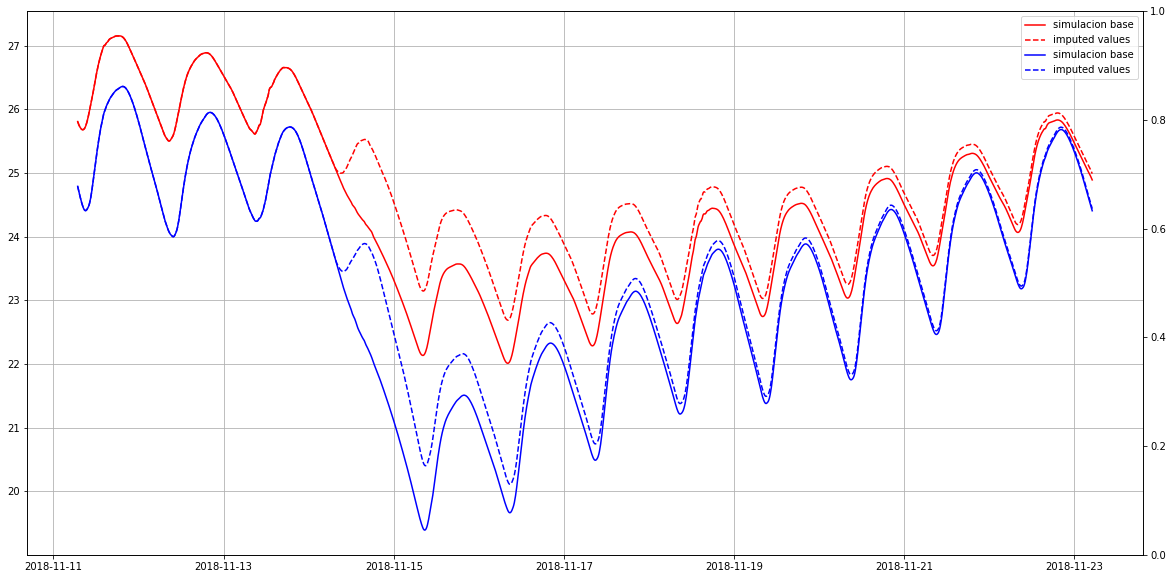

In [160]:
dia=6
thermal_zone='N2STR'
vanish_time,max_index_error,max_time,down_time,max_error,df_rolled,df_inic,df_diff=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
fig, ax=plt.subplots(figsize=(20,10))
ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='simulacion base')

ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'r--',label='imputed values')
ax2=ax.twinx()
# ax2.plot(df_inic[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'r-',label='error_n2')
#     ax2.plot(df_rolled[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time)],'m-',label='error_rolled')
thermal_zone='N1AU404'
vanish_time_n1,max_index_error_n1,max_time_n1,down_time_n1,max_error_n1,df_rolled_n1,df_inic_n1,df_diff_n1=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
# ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-',label='simulacion base')

# ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g--',label='imputed values')
# ax2.plot(df_inic_n1[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_n1)],'g-',label='error_n1')
#  
thermal_zone='PBSCOM'
vanish_time_pb,max_index_error_pb,max_time_pb,down_time_pb,max_error_pb,df_rolled_pb,df_inic_pb,df_diff_pb=simulation_metrics(
sim_base,sim_imputed,dias,dia,tolerance,thermal_zone)
ax.plot(sim_base[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b-',label='simulacion base')

ax.plot(sim_imputed[thermal_zone].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'b--',label='imputed values')
# ax2.plot(df_inic_pb[thermal_zone].loc[dias[dia]:parse(dias[dia])+pd.Timedelta(vanish_time_pb)],'b-',label='error_pb')
#  
# ax2.plot(sim_base['N1AU404'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)]-sim_base['PBSCOM'].loc[parse(dias[dia])-pd.Timedelta('3D'):parse(dias[dia])+pd.Timedelta(vanish_time)],'g-')

ax.legend()
    #ax2.legend()
# ax2.set_ylim(0,1.7)
#     ax.set_ylim(20,27)
ax.grid()
plt.show()